In [15]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('https://query.data.world/s/uvxpybc55ifqbtues7ytbghhr6rjvy')
data.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-7279641312655250028,user,Etats-Unis,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,us
1,-1456013578740053406,user,Allemagne,de,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,de
2,9006282053848196165,user,Suède,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,689,3205,106.83,8.9,se
3,-7154634866120535654,user,Turquie,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,tr
4,2858299215060733023,user,France,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,709,3205,106.83,8.9,fr


In [8]:
data.dtypes

identifierHash           int64
type                    object
country                 object
language                object
socialNbFollowers        int64
socialNbFollows          int64
socialProductsLiked      int64
productsListed           int64
productsSold             int64
productsPassRate       float64
productsWished           int64
productsBought           int64
gender                  object
civilityGenderId         int64
civilityTitle           object
hasAnyApp                 bool
hasAndroidApp             bool
hasIosApp                 bool
hasProfilePicture         bool
daysSinceLastLogin       int64
seniority                int64
seniorityAsMonths      float64
seniorityAsYears       float64
countryCode             object
dtype: object

In [9]:
data.shape

(98913, 24)

In [12]:
data.isnull().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

total number of obseration is: 98913


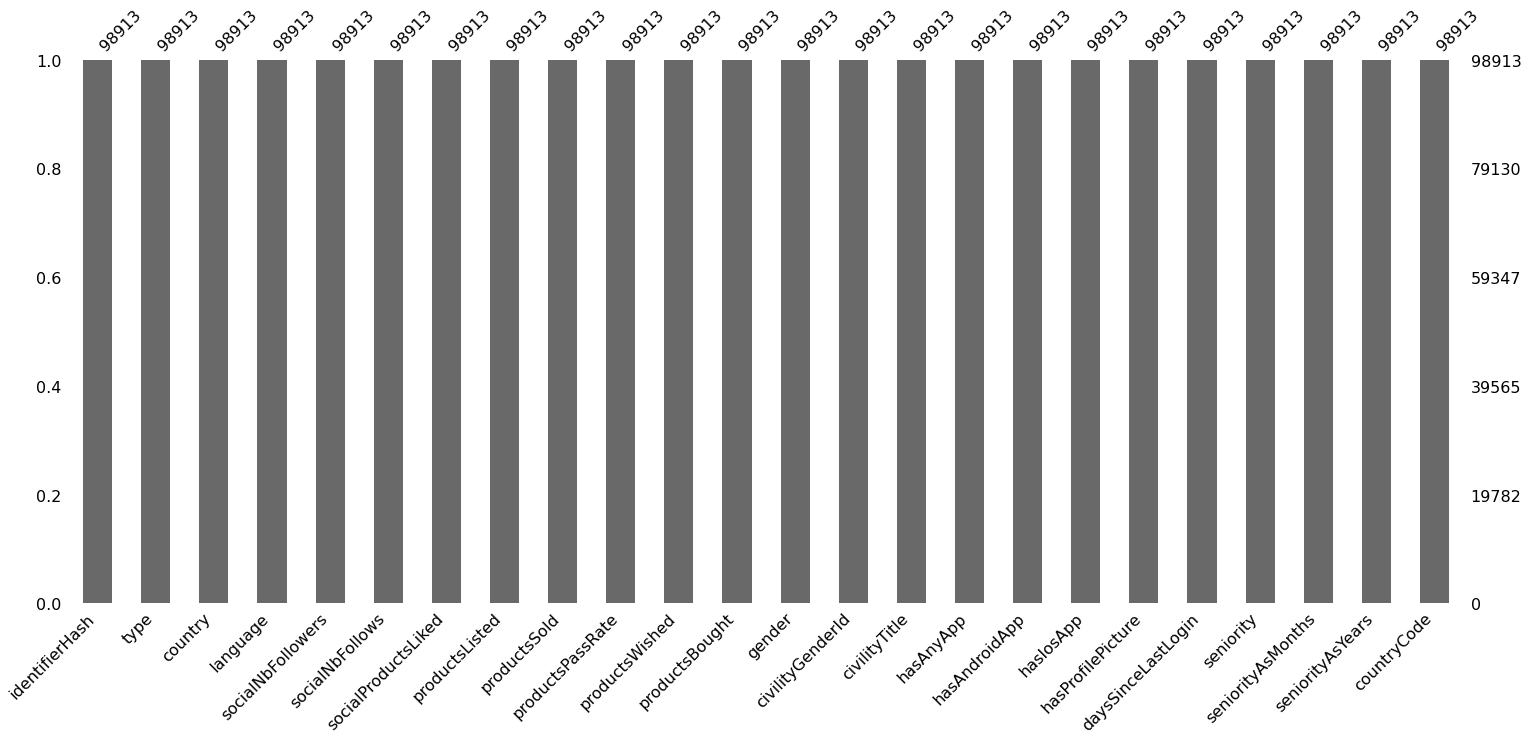

In [16]:
print ('total number of obseration is:',data.shape[0])
msno.bar(data)

In [87]:
df=data[['identifierHash','country','daysSinceLastLogin','productsBought']]

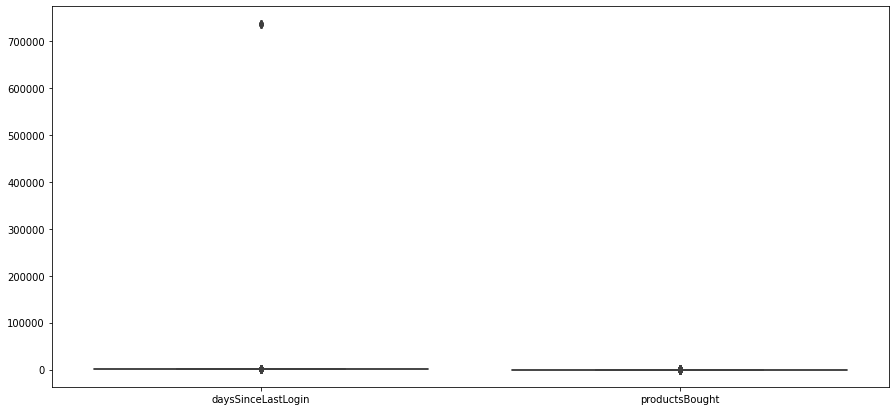

In [88]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df[['daysSinceLastLogin','productsBought']])
plt.show()

we have outlier at dataset. we will remove with IQR/
Steps to perform Outlier Detection by identifying the lowerbound and upperbound of the data:
1. Arrange your data in ascending order
2. Calculate Q1 ( the first Quarter)
3. Calculate Q3 ( the third Quartile)
4. Find IQR = (Q3 - Q1)
5. Find the lower Range = Q1 -(1.5 * IQR)
6. Find the upper Range = Q3 + (1.5 * IQR)

In [89]:
IQR=df['daysSinceLastLogin'].quantile(0.75)-df['daysSinceLastLogin'].quantile(0.25)
l = df['daysSinceLastLogin'].quantile(0.25)-(1.5*IQR)
u = df['daysSinceLastLogin'].quantile(0.75)+(1.5*IQR)


In [90]:
#filter data
a=df[df['daysSinceLastLogin']>u]
b=df[df['daysSinceLastLogin']<l]
df_new=df[(df['daysSinceLastLogin']<u)&(df['daysSinceLastLogin']>l)]

In [91]:
print('data.shape before removing outlier',df.shape)
print('data.shape after removing outlier',df_new.shape)
print('Total number of outlier:',len(a)+len(b))

data.shape before removing outlier (98913, 4)
data.shape after removing outlier (82288, 4)
Total number of outlier: 16594


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


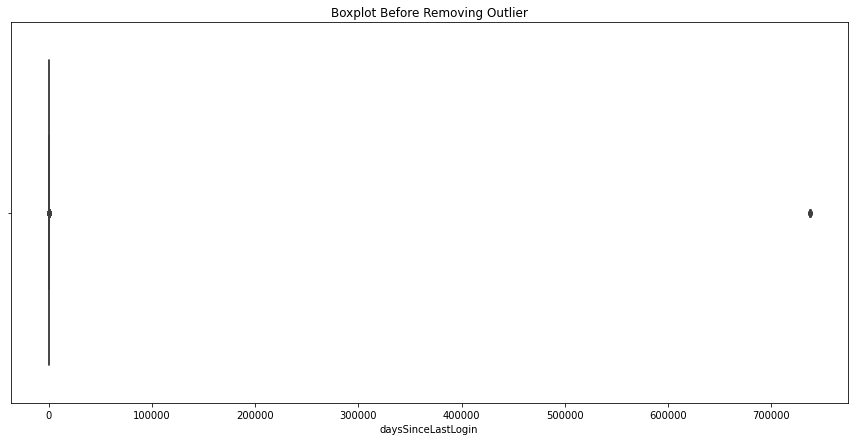

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


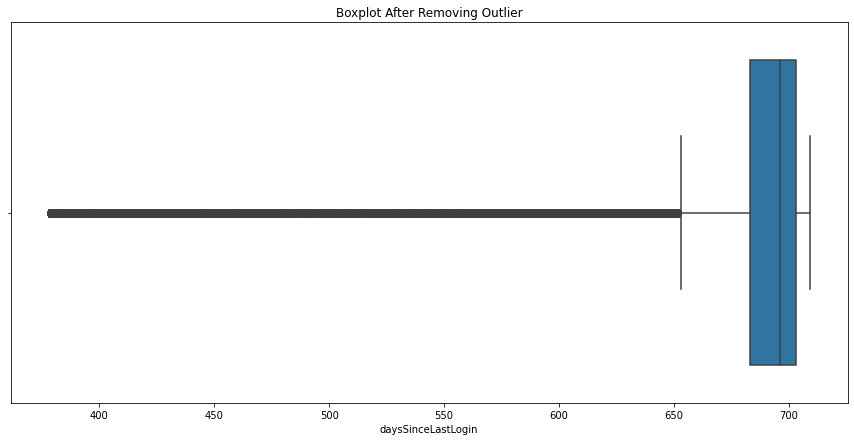

In [92]:
#### plot the boxplot before and after remove the outlier
plt.figure(figsize=(15,7))
sns.boxplot(df['daysSinceLastLogin'])
plt.title('Boxplot Before Removing Outlier')
plt.show()

plt.figure(figsize=(15,7))
sns.boxplot(df_new['daysSinceLastLogin'])
plt.title('Boxplot After Removing Outlier')
plt.show()

In [93]:
df_new.reset_index(drop=True, inplace= True)
df_new

,identifierHash,country,daysSinceLastLogin,productsBought
0,-7279641312655250028,Etats-Unis,709,0
1,-1456013578740053406,Allemagne,709,0
2,9006282053848196165,Suède,689,0
3,-7154634866120535654,Turquie,709,0
4,2858299215060733023,France,709,0
...,...,...,...,...
82283,-5212100190867739388,Etats-Unis,708,0
82284,-5324380437900495747,Etats-Unis,708,0
82285,-5607668753771114442,France,695,0
82286,350630276238833248,Belgique,520,0


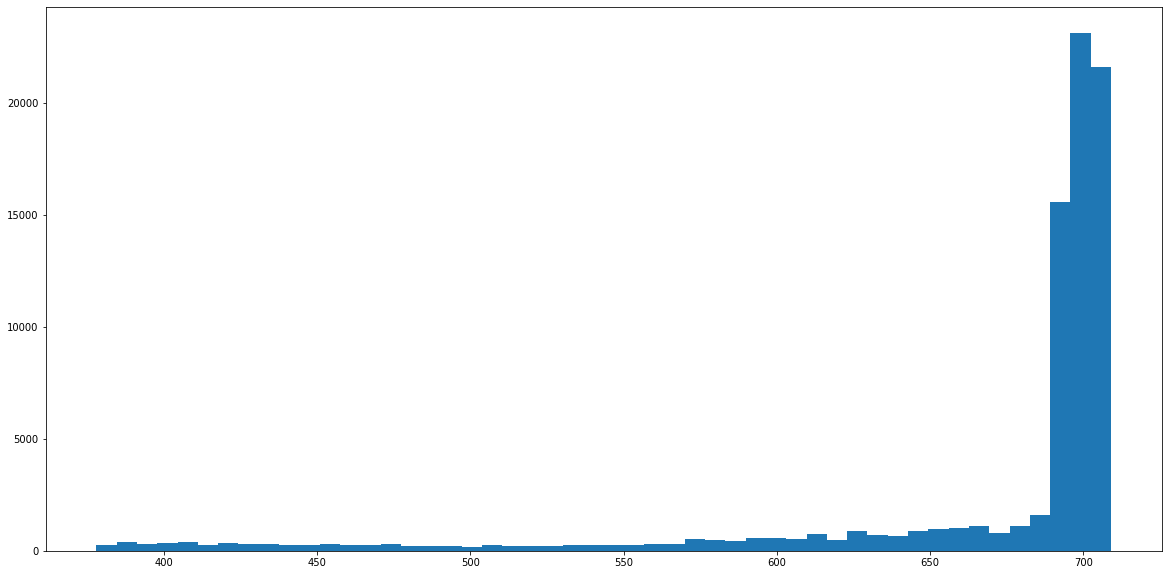

In [94]:
plt.figure(figsize=(20,10))
plt.hist(df_new['daysSinceLastLogin'],bins=50)
plt.show()

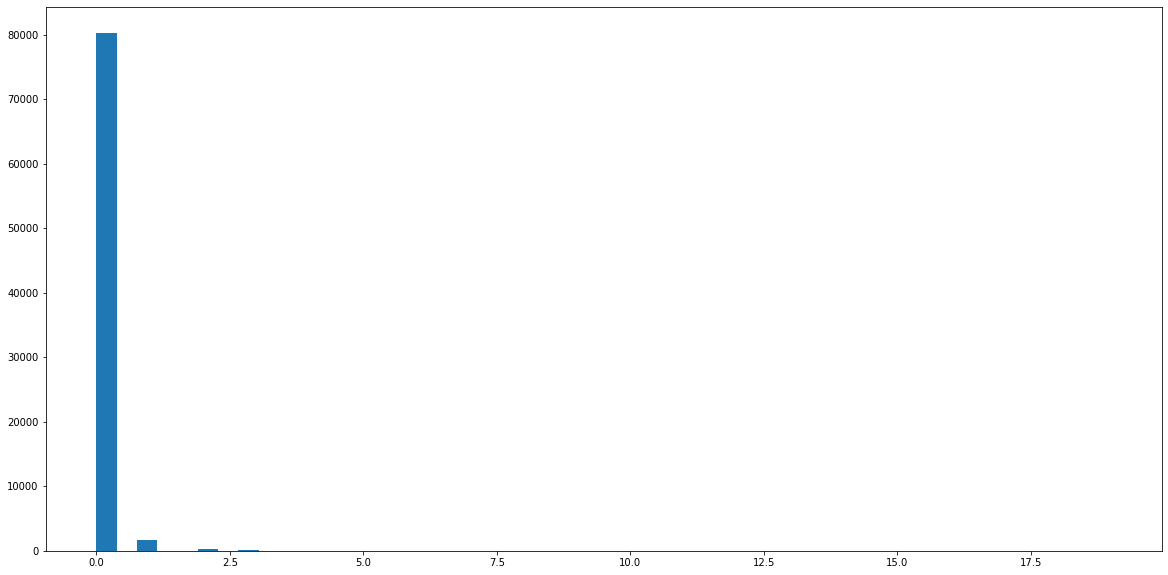

In [95]:
plt.figure(figsize=(20,10))
plt.hist(df_new['productsBought'],bins=50)
plt.show()

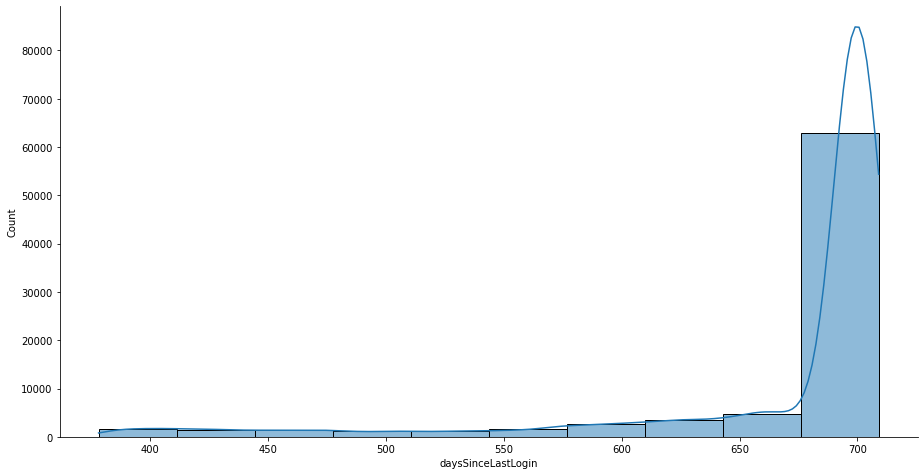

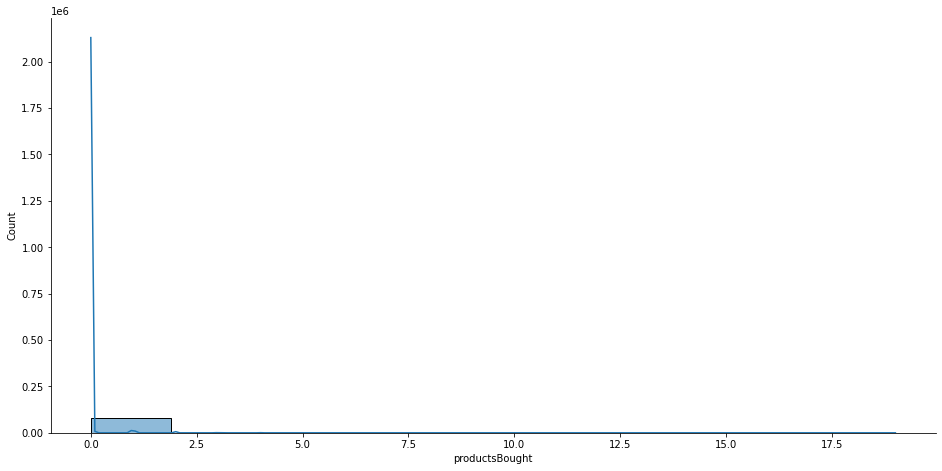

In [96]:
df_num=['daysSinceLastLogin','productsBought']
for i in df_num:
    sns.displot(df_new[i],bins=10,kde=True)
    plt.gcf().set_size_inches(15, 7)
    plt.show()

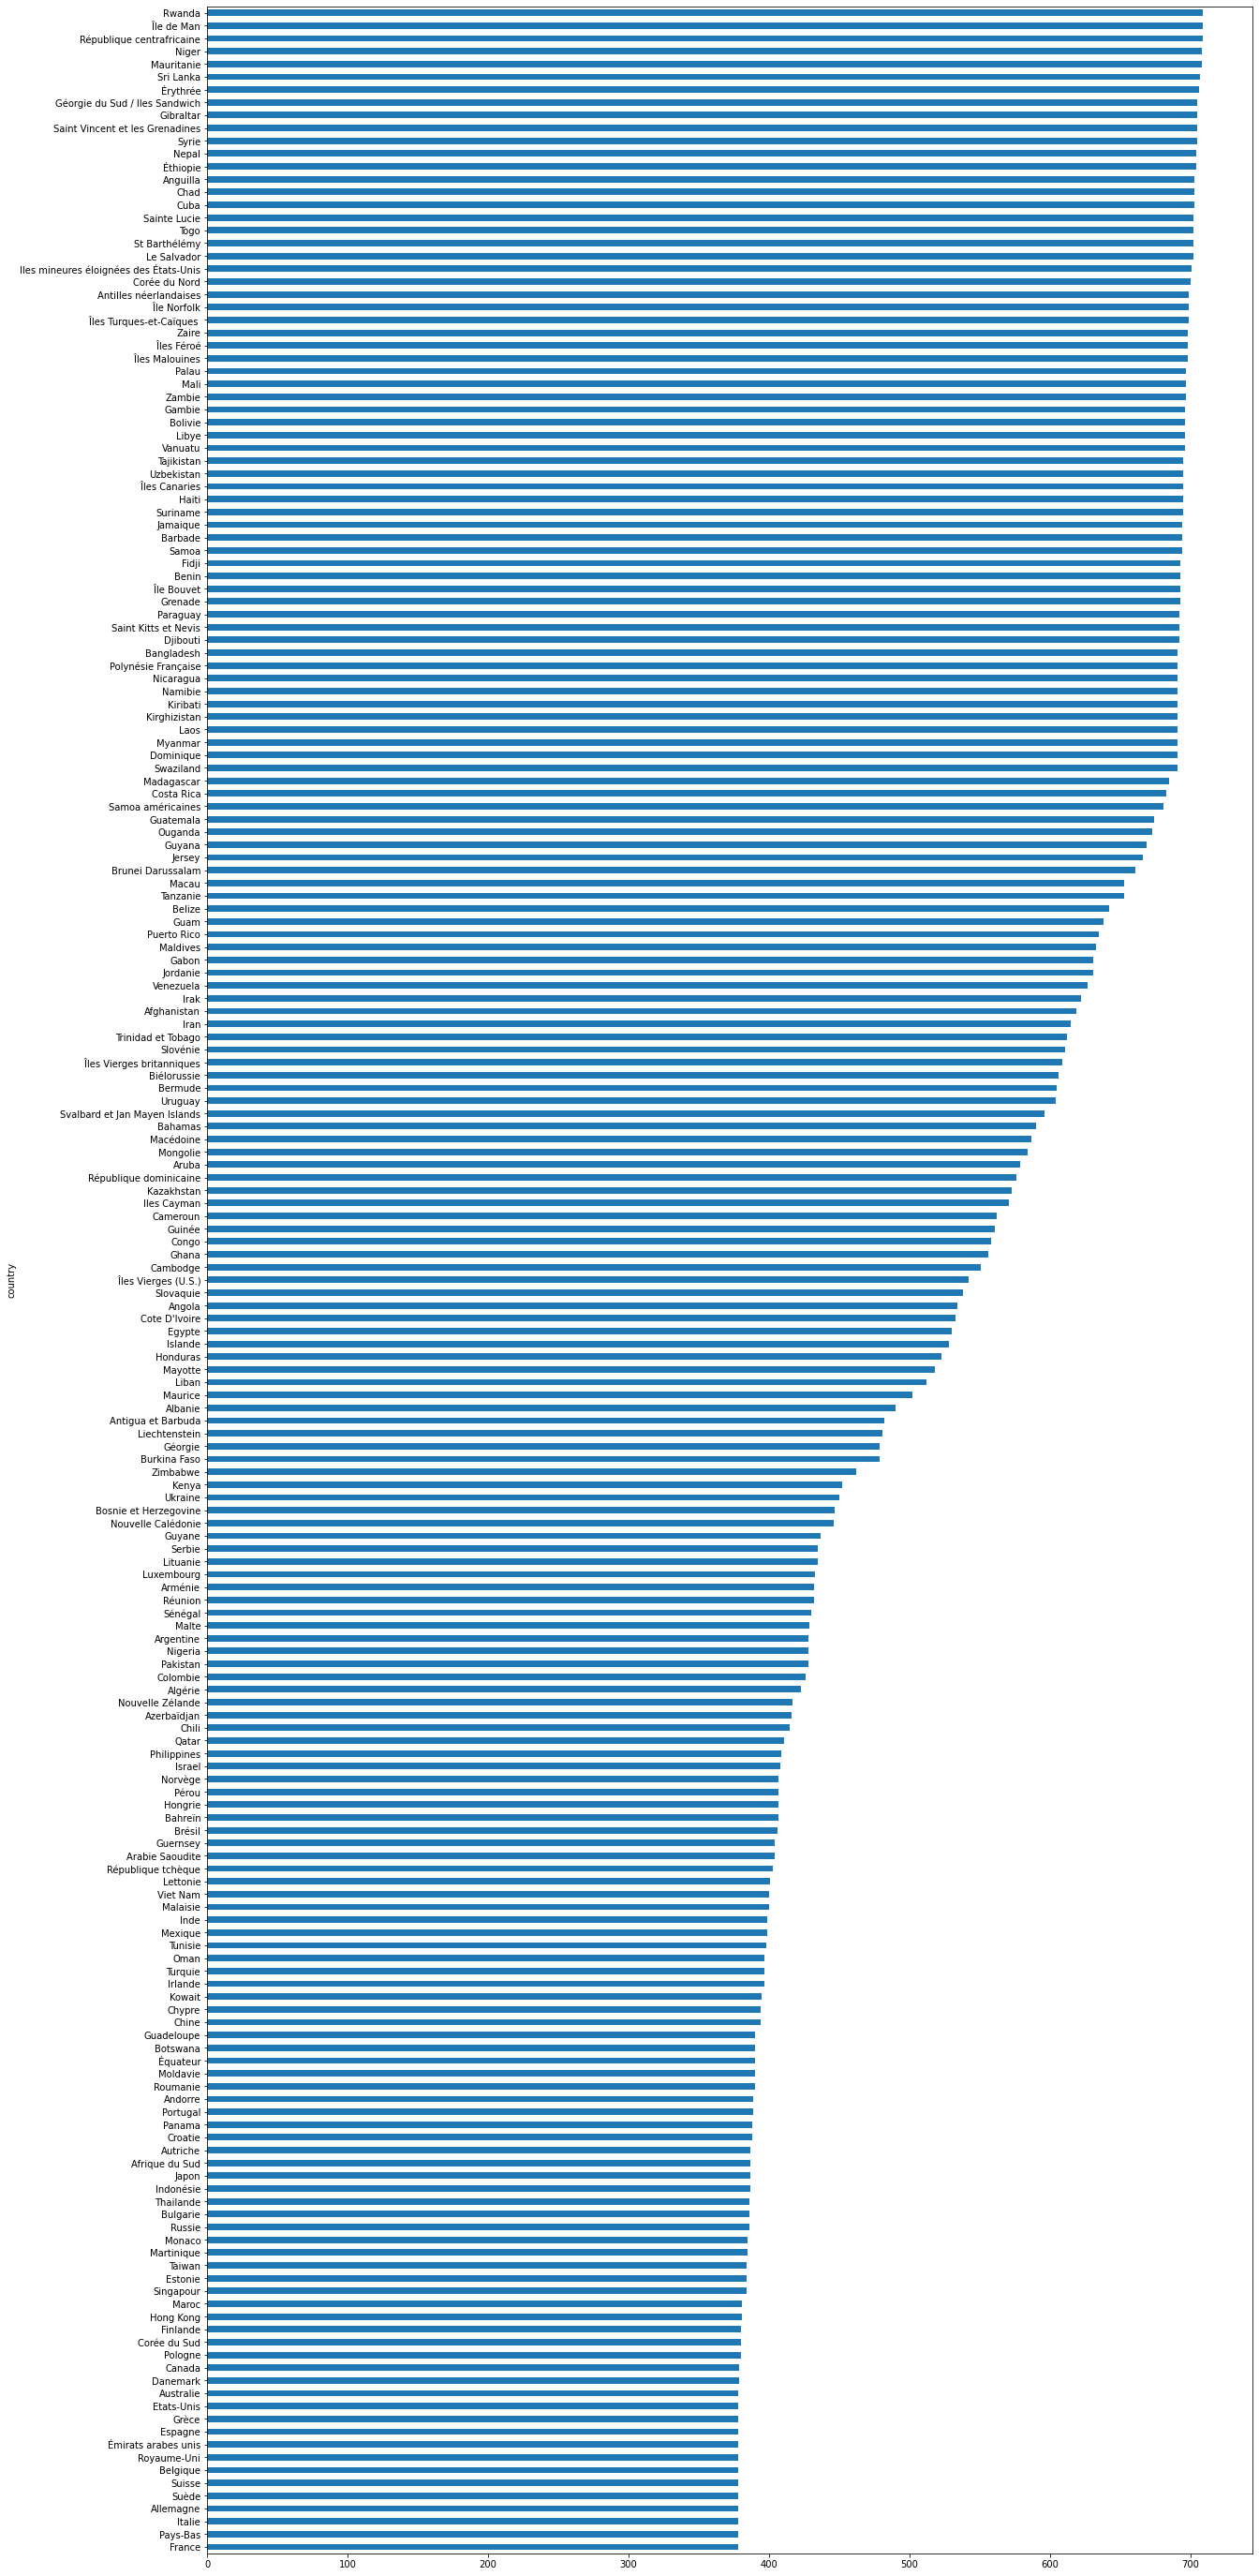

In [124]:
#recent login
plt.figure(figsize=(20,50))
df_new.groupby("country").daysSinceLastLogin.min().sort_values(ascending=True).plot.barh()
plt.show()

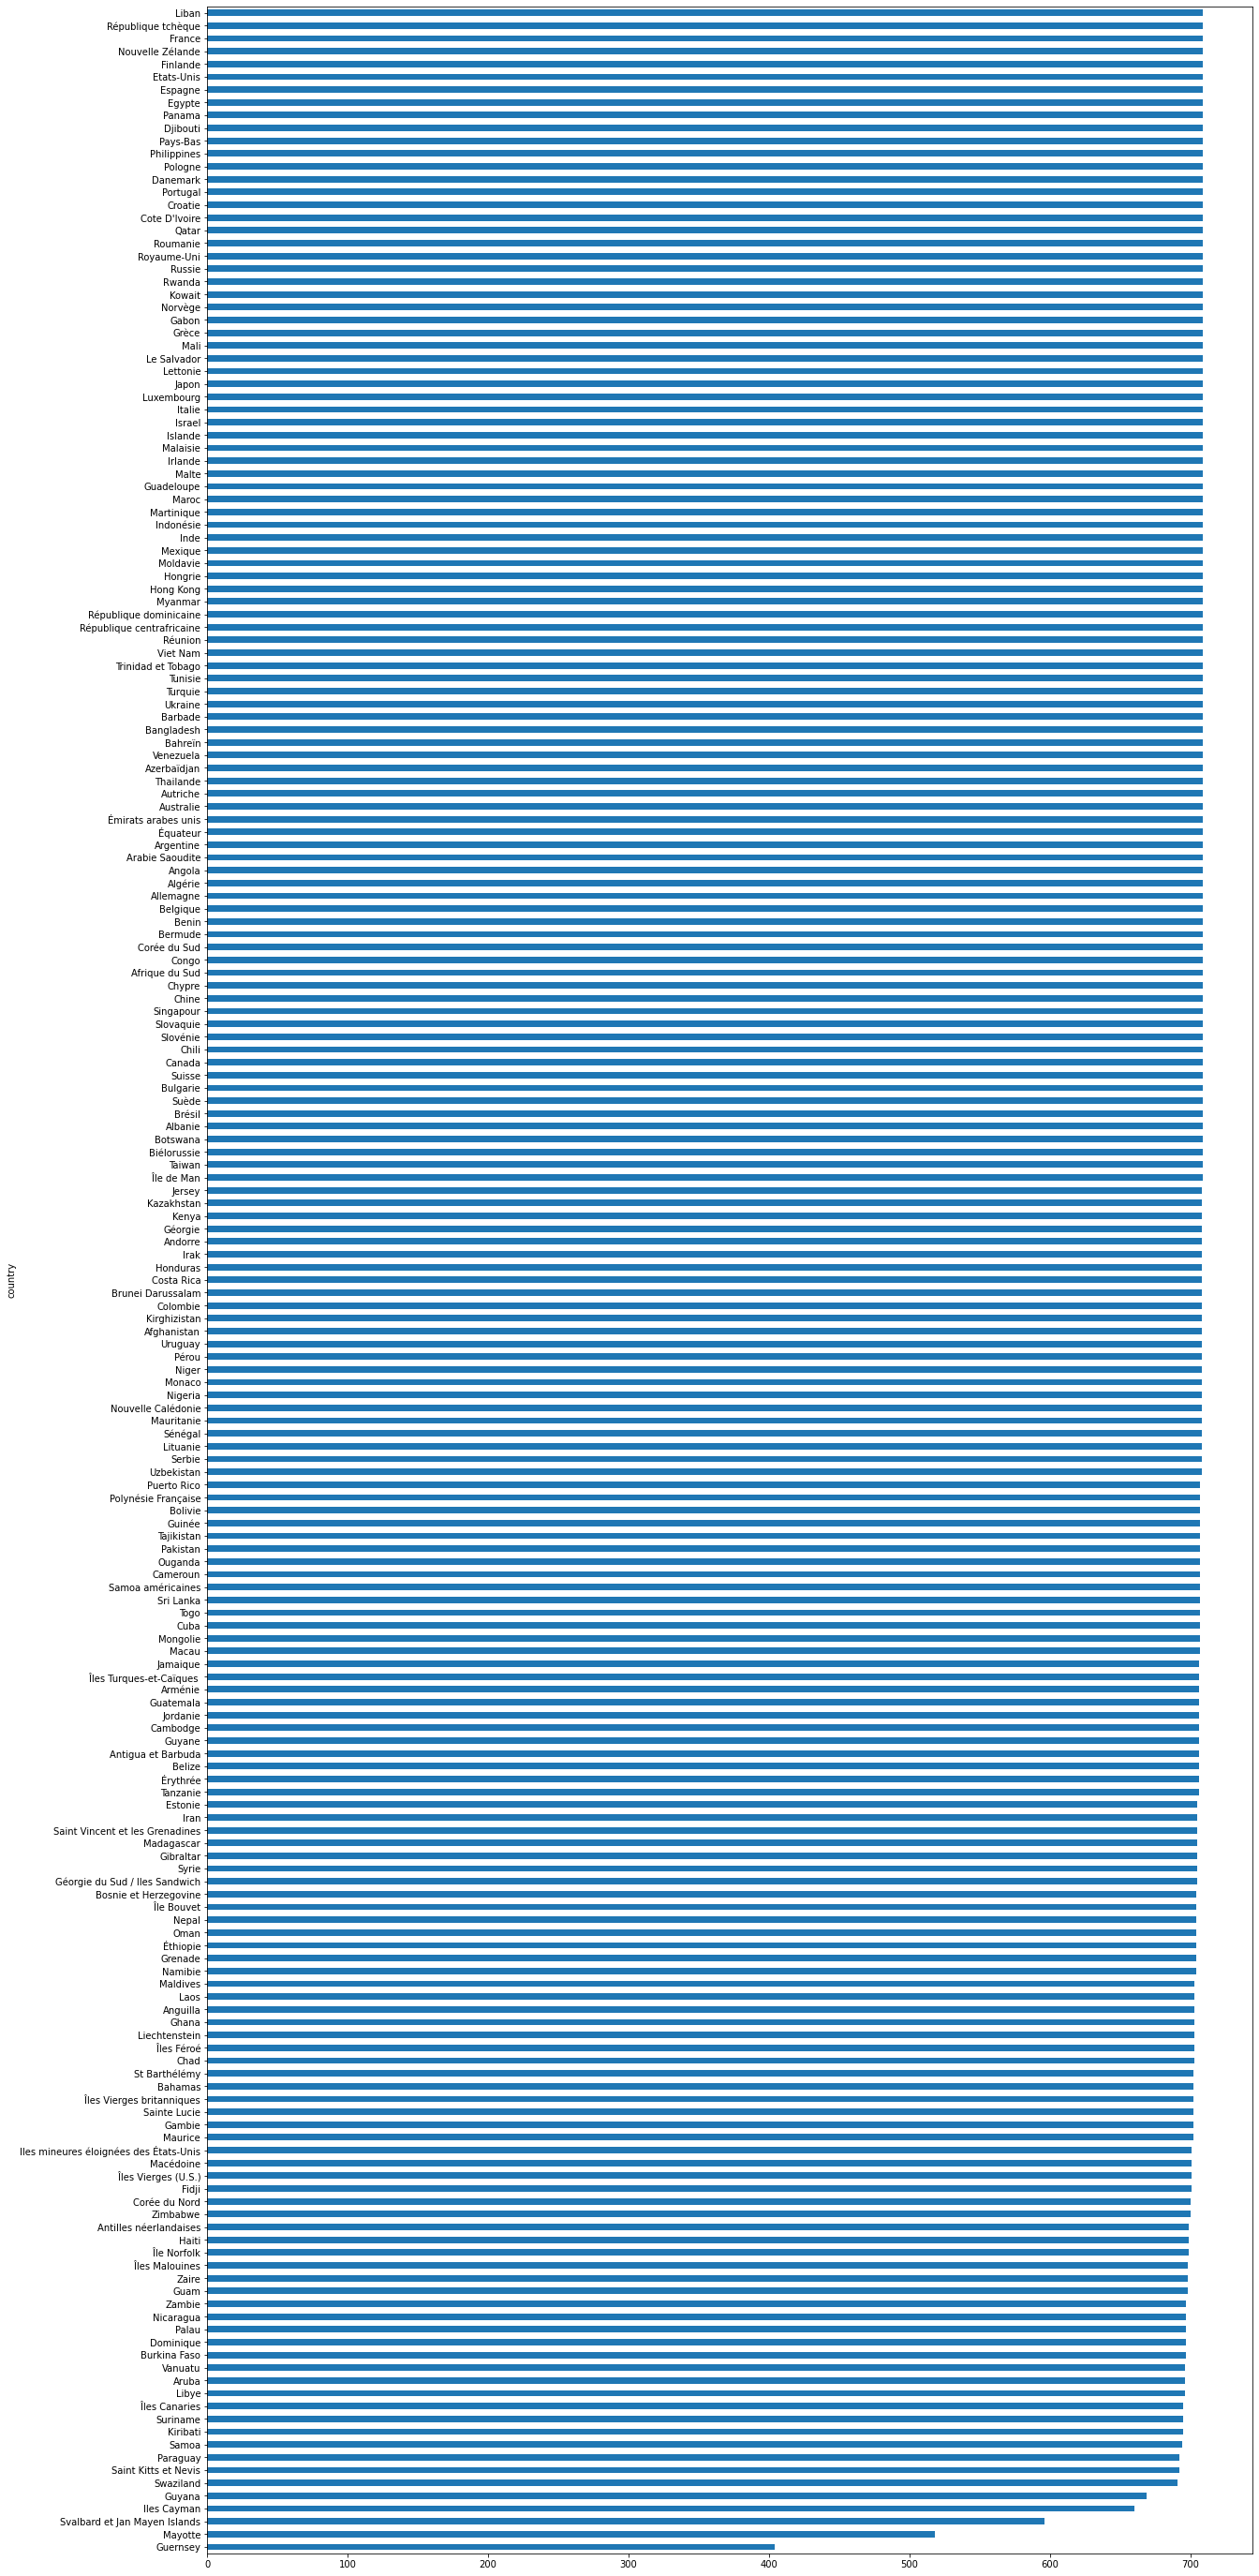

In [125]:
#oldest login
plt.figure(figsize=(20,50))
df_new.groupby("country").daysSinceLastLogin.max().sort_values(ascending=True).plot.barh()
plt.show()

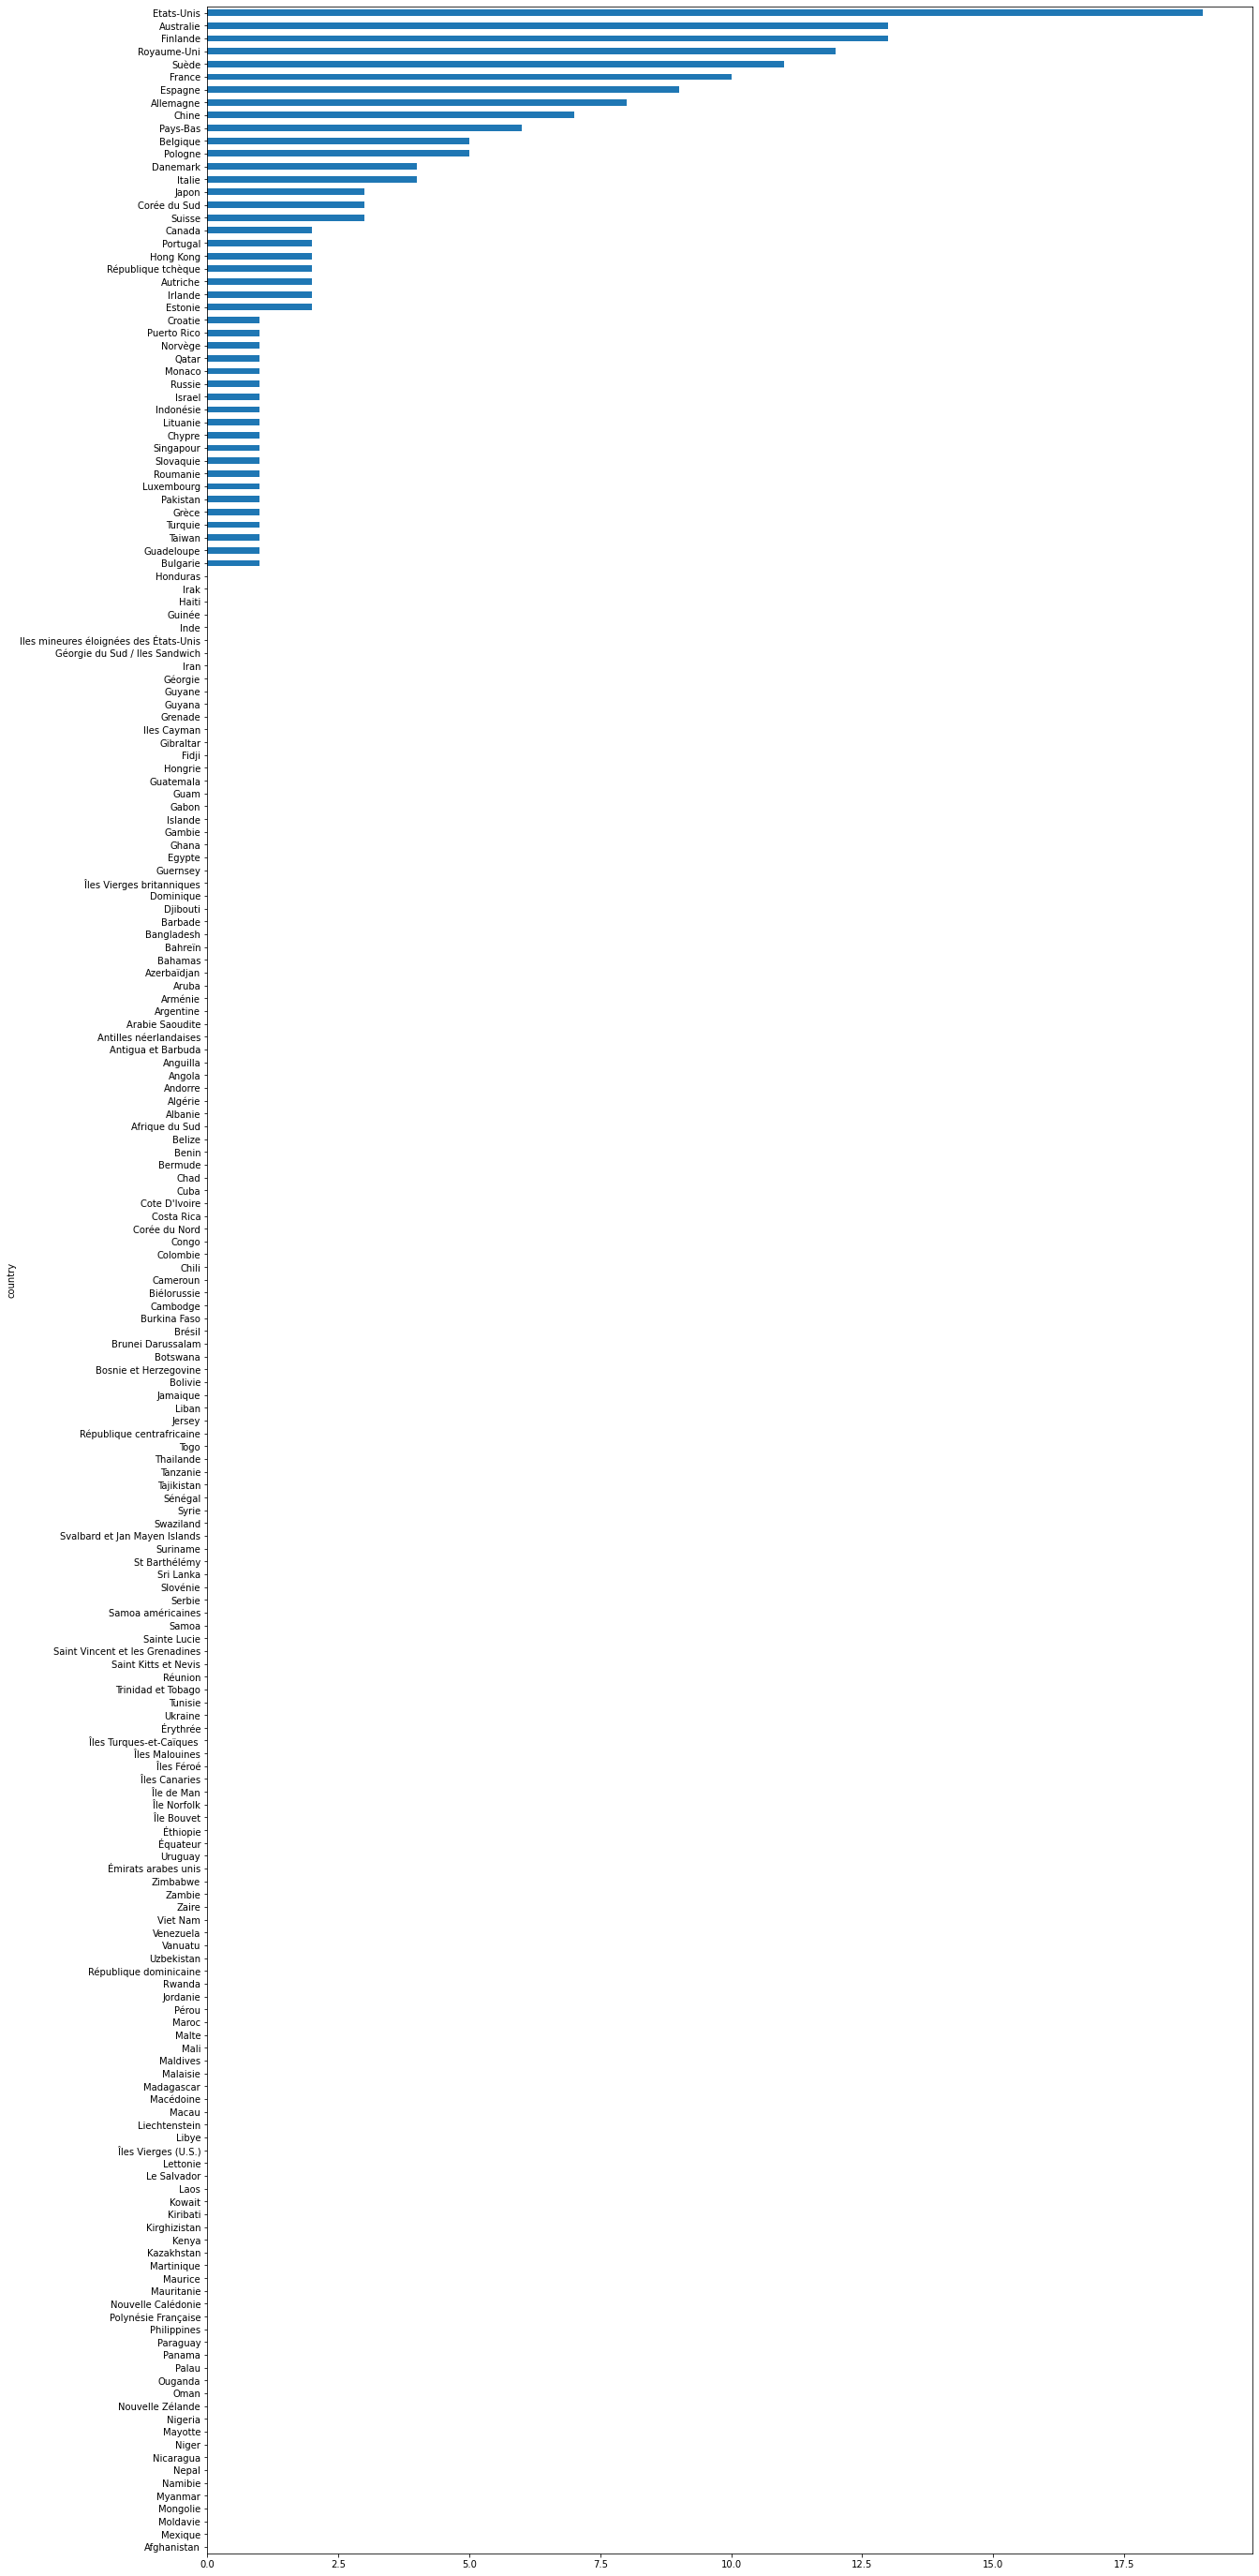

In [123]:
#recent login
plt.figure(figsize=(20,50))
df_new.groupby("country").productsBought.max().sort_values(ascending=True).plot.barh()
plt.show()

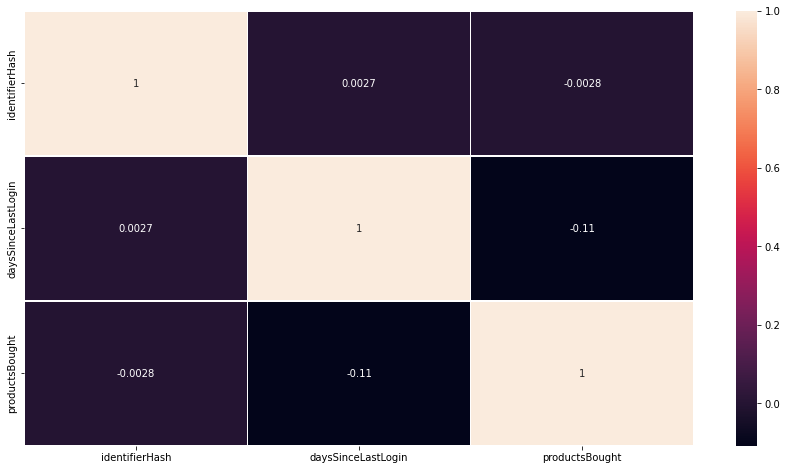

In [131]:
plt.figure(figsize=(15,8))
sns.heatmap(df_new.corr(), linewidth=0.5,annot=True)
plt.show()

from figure above, value correlation closer to zero there is no linear trend.

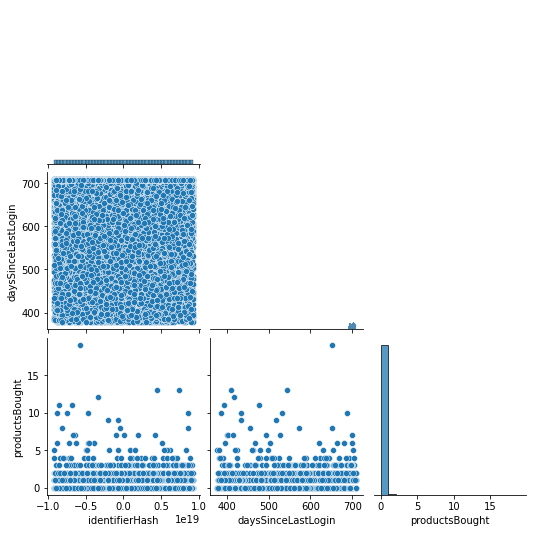

In [137]:
sns.pairplot(df_new, corner=True)
plt.show()

In [143]:
from sklearn.preprocessing import MinMaxScaler
df2=df_new[['daysSinceLastLogin','productsBought']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df2)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns=['daysSinceLastLogin','productsBought']
scaled_df['country']=df_new['country']
scaled_df.head()

,daysSinceLastLogin,productsBought,country
0,1.000000,0.0,Etats-Unis
1,1.000000,0.0,Allemagne
2,0.939577,0.0,Suède
3,1.000000,0.0,Turquie
4,1.000000,0.0,France


 K-means Clusters: Elbow Method

In [145]:
df_k=scaled_df.drop(columns=['country'],axis=1)

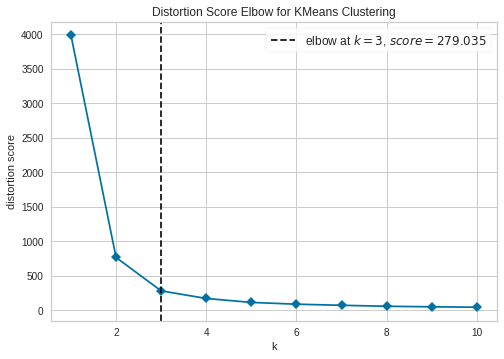

In [147]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)        # Fit data to visualizer
visualizer.show() 

In [156]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= False)
visualizer.fit(df_k)        # Fit the data to the visualizer
visualizer.show()

KeyboardInterrupt: ignored

In [152]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_k)
df_k['clusters']= y_predicted
df_k

,daysSinceLastLogin,productsBought,clusters
0,1.000000,0.0,0
1,1.000000,0.0,0
2,0.939577,0.0,0
3,1.000000,0.0,0
4,1.000000,0.0,0
...,...,...,...
82283,0.996979,0.0,0
82284,0.996979,0.0,0
82285,0.957704,0.0,0
82286,0.429003,0.0,1


In [153]:
km.cluster_centers_

array([[0.96387323, 0.00104894],
       [0.1986606 , 0.00584988],
       [0.66889548, 0.00401829]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


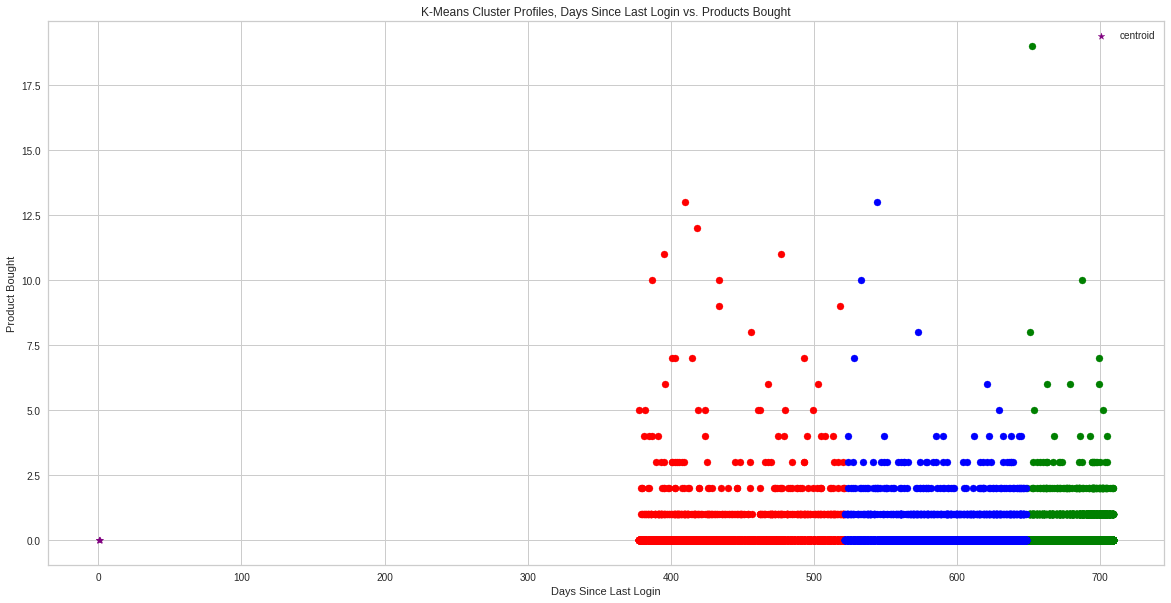

In [169]:
df_new['clusters']= y_predicted
c1 = df_new[df_new.clusters==0]
c2 = df_new[df_new.clusters==1]
c3 = df_new[df_new.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(c1.daysSinceLastLogin,c1['productsBought'],color='green')
plt.scatter(c2.daysSinceLastLogin,c2['productsBought'],color='red')
plt.scatter(c3.daysSinceLastLogin,c3['productsBought'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Days Since Last Login')
plt.ylabel('Product Bought')
plt.title('K-Means Cluster Profiles, Days Since Last Login vs. Products Bought')
plt.show()

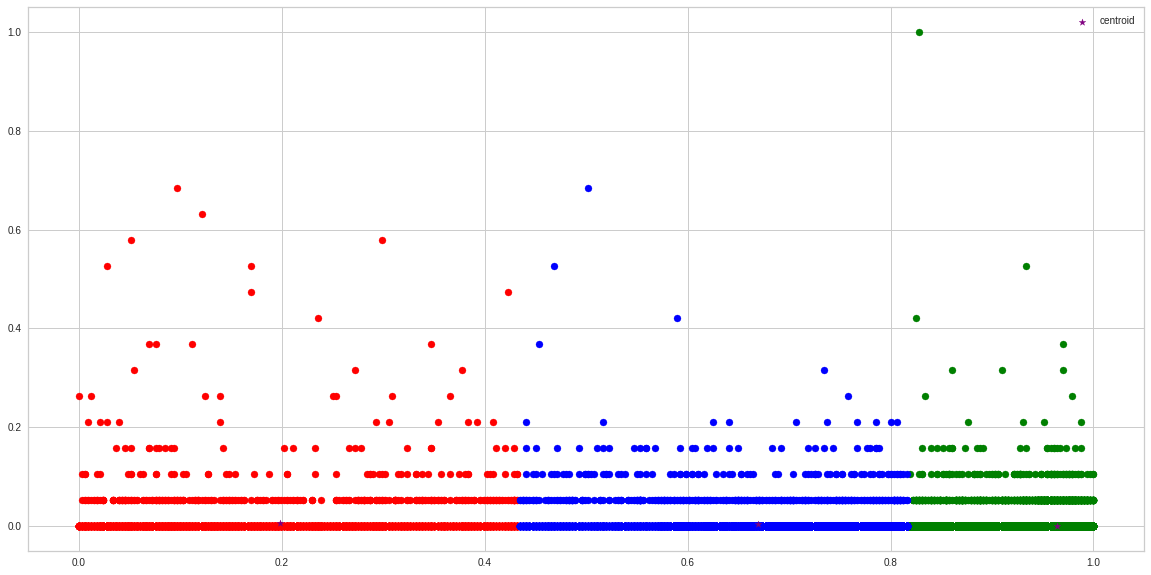

In [155]:
df_k['clusters']= y_predicted
c1 = df_k[df_k.clusters==0]
c2 = df_k[df_k.clusters==1]
c3 = df_k[df_k.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(c1.daysSinceLastLogin,c1['productsBought'],color='green')
plt.scatter(c2.daysSinceLastLogin,c2['productsBought'],color='red')
plt.scatter(c3.daysSinceLastLogin,c3['productsBought'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.show()


**Conslution**



* Cluster 0 consists of user last login between 380 and 520 days, and total products bought between 0 to 12;

* Cluster 1 consists of user last login between 520 and 650 days, and total products bought between 0 to 12;

* Cluster 2 consists of user last login between 620 and 720 days, and total products bought between 0 to 10;